## Множественная линейная регрессия

На практике чаще всего у нас есть несколько НП, и мы ходим предсказывать ЗП по их сочетанию.  
В таком случае коэффициентов угла наклона у нас становится больше одного и основное уравнение регрессии начинает выглядеть так:  
Y = b0 + b1 \* X1 + b2 \* X2 + ... + bn \* Xn + ϵ  
где n – это номер предиктора и соответствующего ему коэффициента.

Требования к данным:
* Линейная зависимость переменных
* Нормальность и гомоскедантичность (различия в дисперсии на разнразличия в дисперсии на разных уровнях НП, дисперсия должна быть примерно одинакова) остатков
* Нормальность распределения переменных
* Проверка на мультиколлинеарность - феномен, возникающий при сильной корреляции между независимыми переменными.  
При мультиколлинеарности стандартные ошибки коэффициентов линейной регрессии искусственно завышаются,  
что приводит к повышенной ошибке II рода. Если убрать высококоррелирующую переменную из числа НП,  
то это может привести к увеличению качества модели, а коэффициенты будут значимы.



In [1]:
import pandas as pd
import statsmodels.formula.api as sm

states_data = pd.read_csv('./data/states.csv')

model = sm.ols(formula='poverty ~ metro_res + white + hs_grad + female_house', data=states_data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           8.88e-10
Time:                        12:35:49   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280   

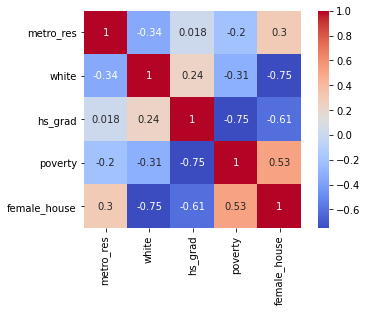

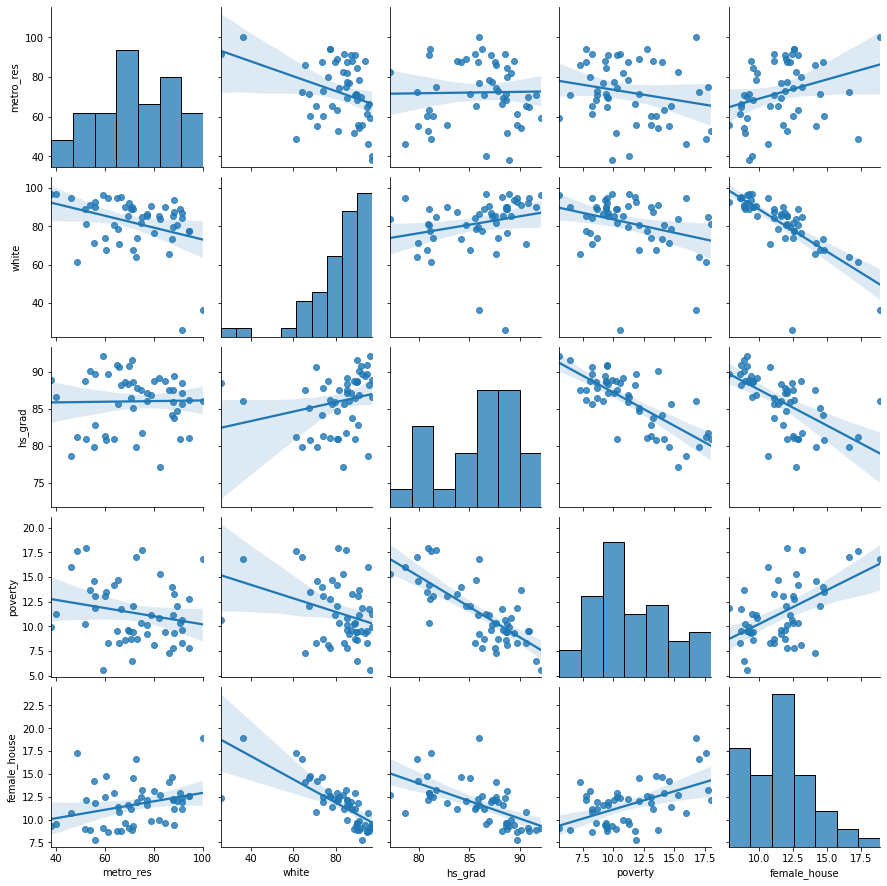

In [2]:
import seaborn as sns

sns.heatmap(states_data.corr(), annot=True, square=True, cmap='coolwarm')
sns.pairplot(states_data, kind='reg')

### Выбор наилучшей модели  
Важно знать, что обычный $R^{2}$ в случае множественной регрессии менее адекватен, т.к. он растёт вне зависимости от качества НП в этой модели.  
Чтобы скомпенсировать этот факт, применяют исправленный $R^{2}$ (adjusted $R^{2}$) – он более остро реагирует на “бесполезные” НП,  
в результате чего при их добавлении $R^{2}$ снижается. Это свойство лежит в основе выбора наилучшей модели.

Типичный процесс отбора наилучшей модели – процесс "сверху вниз":  
1. Строим модель со всеми НП, считаем $R^{2}$  
2. Убираем одну из НП, оставляем остальные, снова строим модель и оставляем $R^{2}$  
3. Повторяем так для каждой, оставляем ту модель, у которой $R^{2}$ максимальный  
4. Если в получившейся лучшей модели количество предикторов (НП) меньше, чем в изначальной, снова повторяем процесс уже для этой модели  
5. Повторяем, пока у нас не останется модель с минимальным числом НП и максимальным $R^{2}$

Исключаем переменную, значимо коррелирующую с другими независимыми переменными - female_house

In [3]:
model = sm.ols(formula='poverty ~ metro_res + white + hs_grad', data=states_data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     28.00
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           1.55e-10
Time:                        12:35:56   Log-Likelihood:                -103.41
No. Observations:                  51   AIC:                             214.8
Df Residuals:                      47   BIC:                             222.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.7220      6.389     10.756      0.0